### **Name :** Ajinkya Mahure




-----
Prediction of Severity of COVID-19-Infected Patients Using
Machine Learning Techniques


**DATA PRE-PROCESSING**
------

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree


In [ ]:
# loading dataset

df = pd.read_csv('https://raw.githubusercontent.com/Ajinkya626/Datasets/main/Covid%20Dataset.csv')
print(df)

     Breathing_Problem Fever  ... Sanitization_from_Market COVID-19
0                  Yes   Yes  ...                       No      Yes
1                  Yes   Yes  ...                       No      Yes
2                  Yes   Yes  ...                       No      Yes
3                  Yes   Yes  ...                       No      Yes
4                  Yes   Yes  ...                       No      Yes
...                ...   ...  ...                      ...      ...
5429               Yes   Yes  ...                       No      Yes
5430               Yes   Yes  ...                       No      Yes
5431               Yes   Yes  ...                       No       No
5432               Yes   Yes  ...                       No       No
5433               Yes   Yes  ...                       No       No

[5434 rows x 21 columns]


The **head()** returns the first n rows for the object based on position. If your object has the right type of data in it, it is useful for quick testing. This method is used for returning top n (by default value 5) rows of a data frame or series.

In [ ]:
df.head()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_LungDisease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with COVID Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed Places,Wearing_Masks,Sanitization_from_Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


The **info()** function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing_Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry_Cough                                5434 non-null   object
 3   Sore_throat                              5434 non-null   object
 4   Running_Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic_LungDisease                      5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart_Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper_Tension                            5434 non-null   obj

The **shape** function is used o find the shape of the dataframe.It holds the number of rows followed by the number of columns.

In [ ]:
df.shape

(5434, 21)

The **column** function displays all the columns of the dataset.

In [ ]:
df.columns

Index(['Breathing_Problem', 'Fever', 'Dry_Cough', 'Sore_throat',
       'Running_Nose', 'Asthma', 'Chronic_LungDisease', 'Headache',
       'Heart_Disease', 'Diabetes', 'Hyper_Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad_travel', 'Contact_with COVID Patient',
       'Attended_Large_Gathering', 'Visited_Public_Exposed_Places',
       'Family_working_in_Public_Exposed Places', 'Wearing_Masks',
       'Sanitization_from_Market', 'COVID-19'],
      dtype='object')

The **dtype** function describes the type of data.

In [ ]:
#detect missing data  

print(df.isnull().sum())


Breathing_Problem                          0
Fever                                      0
Dry_Cough                                  0
Sore_throat                                0
Running_Nose                               0
Asthma                                     0
Chronic_LungDisease                        0
Headache                                   0
Heart_Disease                              0
Diabetes                                   0
Hyper_Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad_travel                              0
Contact_with COVID Patient                 0
Attended_Large_Gathering                   0
Visited_Public_Exposed_Places              0
Family_working_in_Public_Exposed Places    0
Wearing_Masks                              0
Sanitization_from_Market                   0
COVID-19                                   0
dtype: int64


In [ ]:
df.dtypes

Breathing_Problem                          object
Fever                                      object
Dry_Cough                                  object
Sore_throat                                object
Running_Nose                               object
Asthma                                     object
Chronic_LungDisease                        object
Headache                                   object
Heart_Disease                              object
Diabetes                                   object
Hyper_Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad_travel                              object
Contact_with COVID Patient                 object
Attended_Large_Gathering                   object
Visited_Public_Exposed_Places              object
Family_working_in_Public_Exposed Places    object
Wearing_Masks                              object
Sanitization_from_Market                   object


**Categorical Encoding**

It is the process of converting categorical data into integer format.

In [ ]:
df['Breathing_Problem'] = df['Breathing_Problem'].astype('category')
df['Fever'] = df['Fever'].astype('category')
df['Dry_Cough'] = df['Dry_Cough'].astype('category')
df['Sore_throat'] = df['Sore_throat'].astype('category')
df['Running_Nose'] = df['Running_Nose'].astype('category')
df['Asthma'] = df['Asthma'].astype('category')
df['Chronic_LungDisease'] = df['Chronic_LungDisease'].astype('category')
df['Headache'] = df['Headache'].astype('category')
df['Heart_Disease'] = df['Heart_Disease'].astype('category')
df['Diabetes'] = df['Diabetes'].astype('category')
df['Hyper_Tension'] = df['Hyper_Tension'].astype('category')
df['Fatigue '] = df['Fatigue '].astype('category')
df['Gastrointestinal '] = df['Gastrointestinal '].astype('category')
df['Abroad_travel'] = df['Abroad_travel'].astype('category')
df['Contact_with COVID Patient'] = df['Contact_with COVID Patient'].astype('category')
df['Attended_Large_Gathering'] = df['Attended_Large_Gathering'].astype('category')
df['Visited_Public_Exposed_Places'] = df['Visited_Public_Exposed_Places'].astype('category')
df['Family_working_in_Public_Exposed Places'] = df['Family_working_in_Public_Exposed Places'].astype('category')
df['Wearing_Masks'] = df['Wearing_Masks'].astype('category')
df['Sanitization_from_Market'] = df['Sanitization_from_Market'].astype('category')
df['COVID-19'] = df['COVID-19'].astype('category')
df.dtypes

Breathing_Problem                          category
Fever                                      category
Dry_Cough                                  category
Sore_throat                                category
Running_Nose                               category
Asthma                                     category
Chronic_LungDisease                        category
Headache                                   category
Heart_Disease                              category
Diabetes                                   category
Hyper_Tension                              category
Fatigue                                    category
Gastrointestinal                           category
Abroad_travel                              category
Contact_with COVID Patient                 category
Attended_Large_Gathering                   category
Visited_Public_Exposed_Places              category
Family_working_in_Public_Exposed Places    category
Wearing_Masks                              category
Sanitization

Here, Yes is converted to 1
       No is converted to 0


In [ ]:
#Categorical Encoding : Label Encoding

df['Breathing_Problem'] = df['Breathing_Problem'].cat.codes
df['Fever'] = df['Fever'].cat.codes
df['Dry_Cough'] = df['Dry_Cough'].cat.codes
df['Sore_throat'] = df['Sore_throat'].cat.codes
df['Running_Nose'] = df['Running_Nose'].cat.codes
df['Asthma'] = df['Asthma'].cat.codes
df['Chronic_LungDisease'] = df['Chronic_LungDisease'].cat.codes
df['Headache'] = df['Headache'].cat.codes
df['Heart_Disease'] = df['Heart_Disease'].cat.codes
df['Diabetes'] = df['Diabetes'].cat.codes
df['Hyper_Tension'] = df['Hyper_Tension'].cat.codes
df['Fatigue '] = df['Fatigue '].cat.codes
df['Gastrointestinal '] = df['Gastrointestinal '].cat.codes
df['Abroad_travel'] = df['Abroad_travel'].cat.codes
df['Contact_with COVID Patient'] = df['Contact_with COVID Patient'].cat.codes
df['Attended_Large_Gathering'] = df['Attended_Large_Gathering'].cat.codes
df['Visited_Public_Exposed_Places'] = df['Visited_Public_Exposed_Places'].cat.codes
df['Family_working_in_Public_Exposed Places'] = df['Family_working_in_Public_Exposed Places'].cat.codes
df['Wearing_Masks'] = df['Wearing_Masks'].cat.codes
df['Sanitization_from_Market'] = df['Sanitization_from_Market'].cat.codes
df['COVID-19'] = df['COVID-19'].cat.codes
df.dtypes
df

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_LungDisease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with COVID Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed Places,Wearing_Masks,Sanitization_from_Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df)

      Breathing_Problem  Fever  ...  Sanitization_from_Market  COVID-19
0                     1      1  ...                         0         1
1                     1      1  ...                         0         1
2                     1      1  ...                         0         1
3                     1      1  ...                         0         1
4                     1      1  ...                         0         1
...                 ...    ...  ...                       ...       ...
5429                  1      1  ...                         0         1
5430                  1      1  ...                         0         1
5431                  1      1  ...                         0         0
5432                  1      1  ...                         0         0
5433                  1      1  ...                         0         0

[5434 rows x 21 columns]


In [ ]:
df.head()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_LungDisease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with COVID Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed Places,Wearing_Masks,Sanitization_from_Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


The **describe()** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
df.describe()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_LungDisease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with COVID Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed Places,Wearing_Masks,Sanitization_from_Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


The **corr()** function is used to find the pairwise correlation of all columns in the dataframe.

In [ ]:
df.corr()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_LungDisease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with COVID Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed Places,Wearing_Masks,Sanitization_from_Market,COVID-19
Breathing_Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry_Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore_throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running_Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic_LungDisease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart_Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


**DATA VISUALIZATION**
------

In [ ]:
# Plot of COVID Status

df['COVID-19'].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

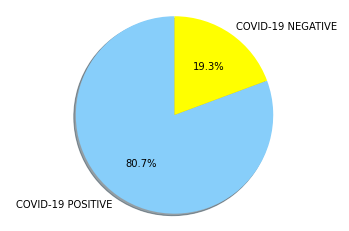

In [ ]:
labels ='COVID-19 POSITIVE', 'COVID-19 NEGATIVE'
sizes = [4383, 1051]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

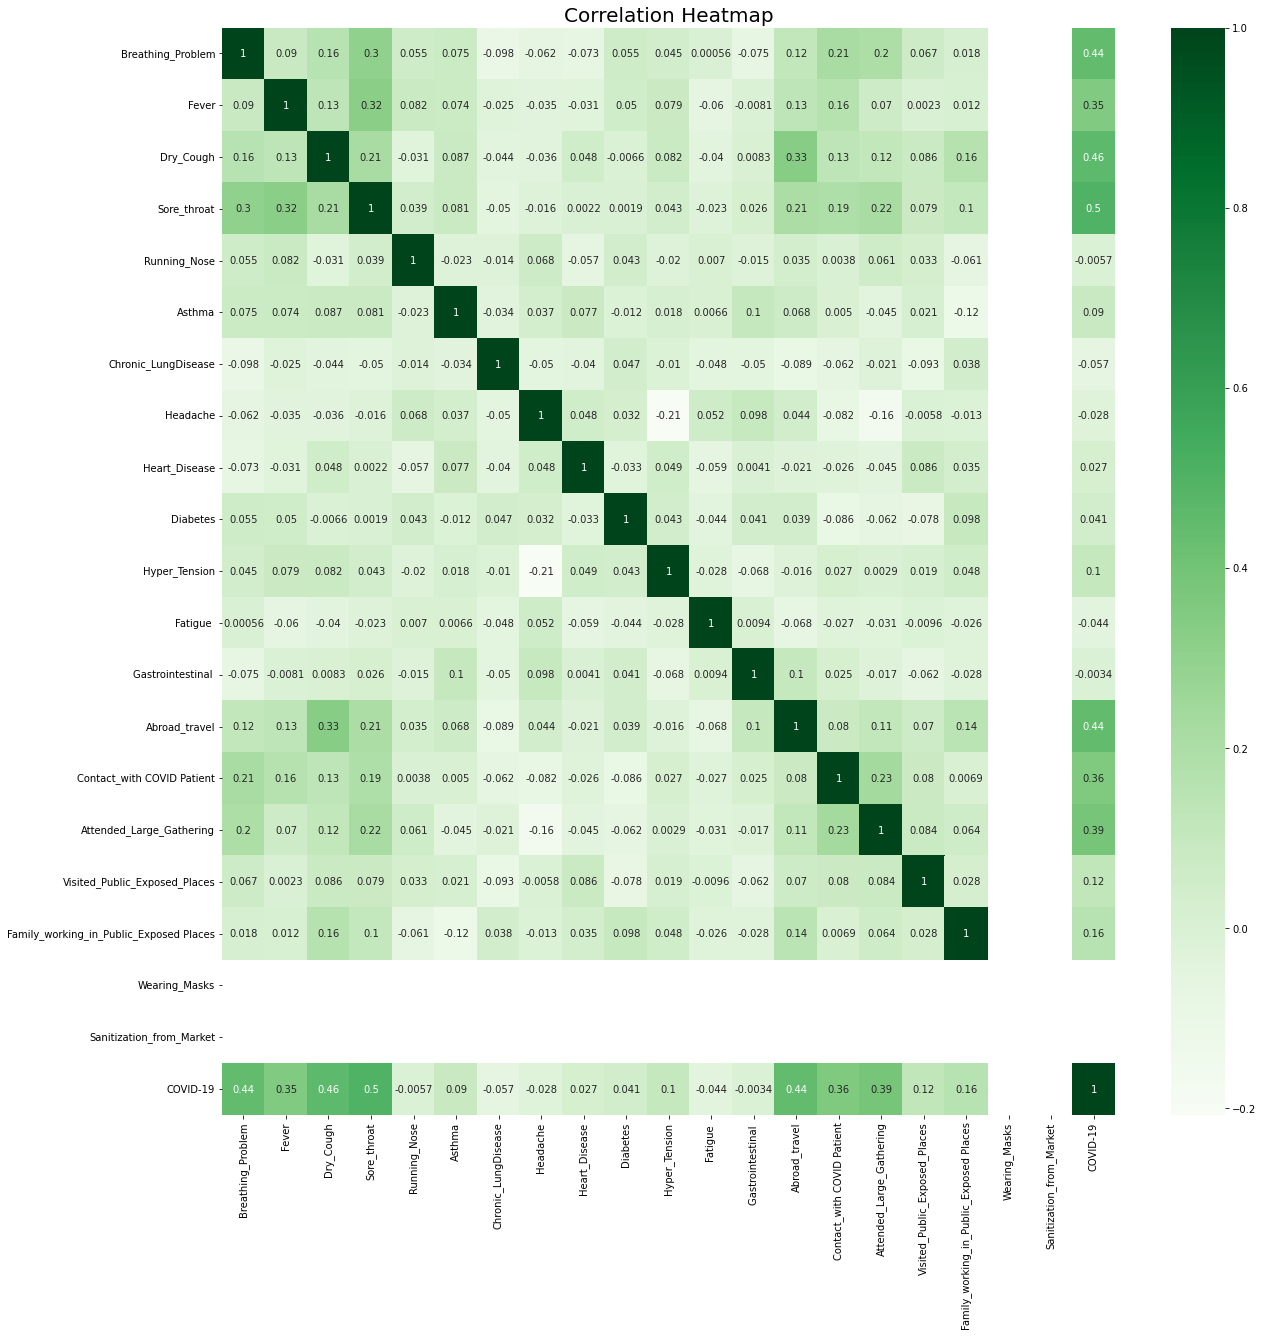

In [ ]:
# See correlation between variables through a correlation heatmap

corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

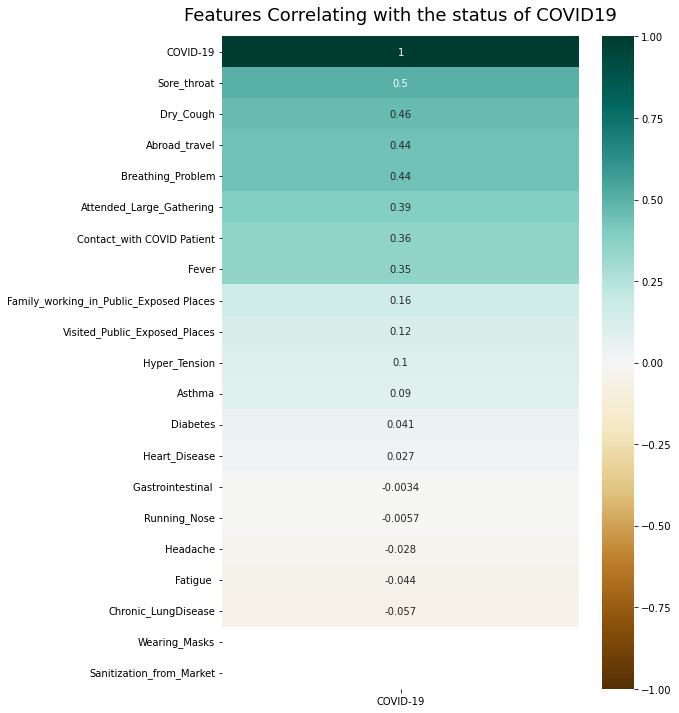

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['COVID-19']].sort_values(by='COVID-19', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of COVID19', fontdict={'fontsize':18}, pad=16);

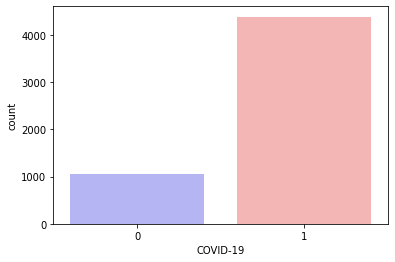

In [ ]:
sns.countplot(x='COVID-19',data=df,palette='bwr')

**SPLIT DATASET**
-----

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data=df

In [ ]:
x=data.drop('COVID-19',axis=1)  
y=data['COVID-19']

In [ ]:
# Values used such as 0.20 where 20 percent of the dataset will be allocated to the test set and 80 percent will be allocated to the training set.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

In [ ]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((4347, 20), (1087, 20))

In [ ]:
y_train.shape,y_test.shape

((4347,), (1087,))

**THEORY:**

**DECISION TREE** 

A Decision Tree is a supervised machine learning algorithm for solving classification and Regression problems.

Used for handling non-linear dataset.

Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. 

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

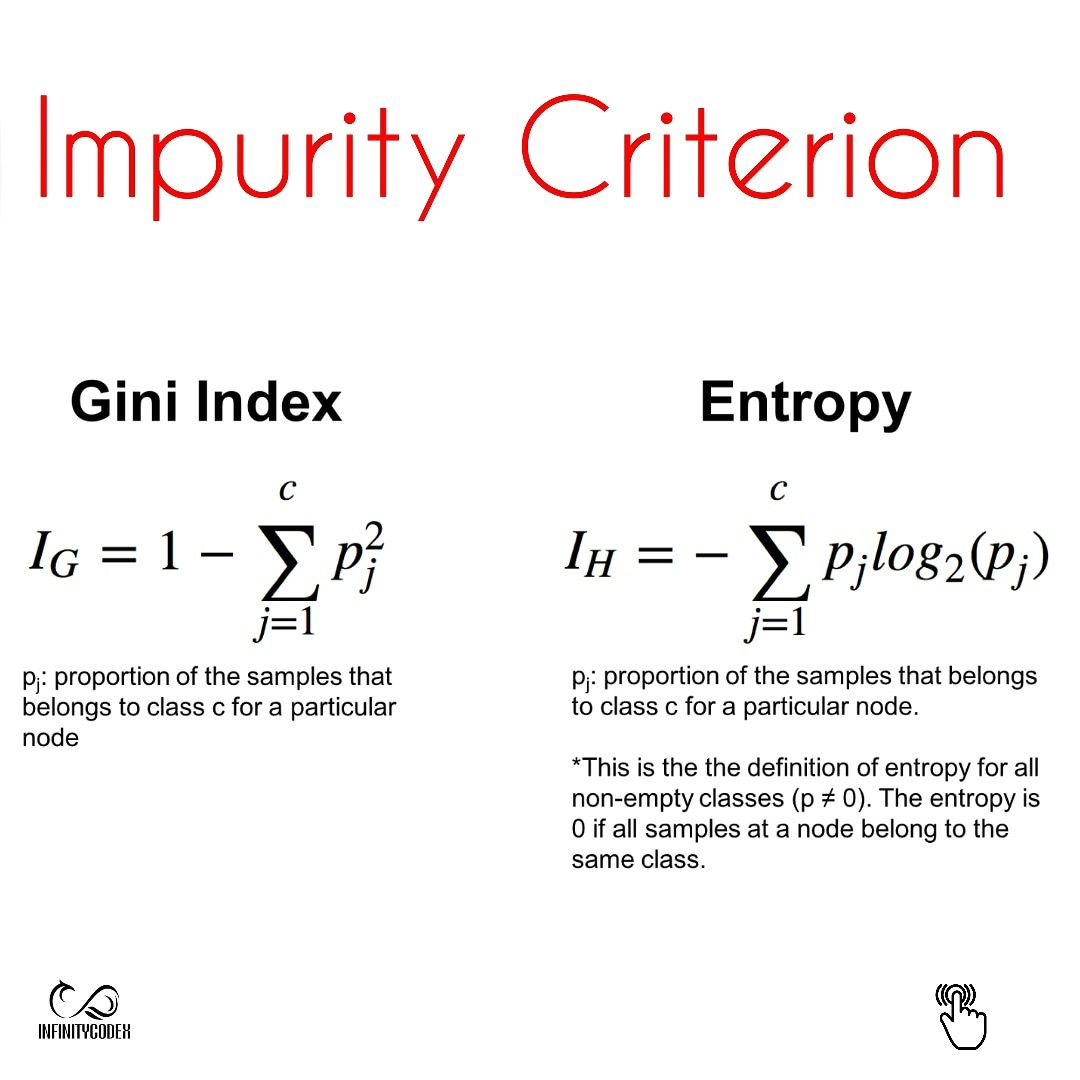

**Decision Tree Classifier with criterion GINI INDEX**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

#fit the model

clf_gini.fit(x_train,y_train)

#Predict the Test set result with criterion gini index

y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)
leaves = clf_gini.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

y_pred_train_gini = clf_gini.predict(x_train)
print(y_pred_train_gini)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_gini.score(x_test,y_test)))

y_pred_test_gini = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_gini))

from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_gini)))

[1 1 1 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=3, random_state=0)>
Model accuracy score with criterion gini index: 0.9319
[1 1 1 ... 1 1 1]
Training-set accuracy score: 0.9314
Training set score: 0.9314
Testing set score: 0.9319
Classification report - 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78       192
           1       0.93      0.99      0.96       895

    accuracy                           0.93      1087
   macro avg       0.93      0.83      0.87      1087
weighted avg       0.93      0.93      0.93      1087

Mean Absolute Error for test : 0.06807727690892364
Mean Squared Error for test: 0.06807727690892364
Root Mean Squared Error for test: 0.2609162258444722
-------------------------------------------------------------
Mean Absolute Error for train: 0.0685530250747642
Mean Squared Error for train: 0.0685530250747642
Root Mean Squared Error for train: 0.2618263261682526

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)

#fit the model

clf_gini.fit(x_train,y_train)

#Predict the Test set result with criterion gini index

y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)
leaves = clf_gini.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

y_pred_train_gini = clf_gini.predict(x_train)
print(y_pred_train_gini)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_gini.score(x_test,y_test)))

y_pred_test_gini = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_gini))

from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_gini)))

[1 1 1 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=2, random_state=0)>
Model accuracy score with criterion gini index: 0.9006
[1 1 1 ... 1 1 1]
Training-set accuracy score: 0.8919
Training set score: 0.8919
Testing set score: 0.9006
Classification report - 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       192
           1       0.94      0.93      0.94       895

    accuracy                           0.90      1087
   macro avg       0.83      0.84      0.83      1087
weighted avg       0.90      0.90      0.90      1087

Mean Absolute Error for test : 0.09935602575896964
Mean Squared Error for test: 0.09935602575896964
Root Mean Squared Error for test: 0.3152079087823934
-------------------------------------------------------------
Mean Absolute Error for train: 0.1081205429031516
Mean Squared Error for train: 0.1081205429031516
Root Mean Squared Error for train: 0.3288168835433357

In [ ]:
#Predict the Test set result with criterion gini index depth = 4

from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

#fit the model
clf_gini.fit(x_train,y_train)
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)
leaves = clf_gini.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_gini.score(x_test,y_test)))

y_pred = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_gini)))

[1 1 1 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=4, random_state=0)>
Model accuracy score with criterion gini index: 0.9476
Training set score: 0.9446
Testing set score: 0.9476
Classification report - 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       192
           1       0.98      0.96      0.97       895

    accuracy                           0.95      1087
   macro avg       0.90      0.92      0.91      1087
weighted avg       0.95      0.95      0.95      1087

Mean Absolute Error for test : 0.05243790248390064
Mean Squared Error for test: 0.05243790248390064
Root Mean Squared Error for test: 0.22899323676453992
-------------------------------------------------------------
Mean Absolute Error for train: 0.1081205429031516
Mean Squared Error for train: 0.1081205429031516
Root Mean Squared Error for train: 0.3288168835433357


**Decision tree classifier with criterion entropy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

#fit the model

clf_en.fit(x_train,y_train)

#Predict the Test set result with criterion gini index

y_pred_entropy = clf_en.predict(x_test)
print(y_pred_entropy)
leaves = clf_en.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_entropy)))

y_pred_train_entropy = clf_en.predict(x_train)
print(y_pred_train_entropy)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_entropy)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_en.score(x_test,y_test)))

y_pred_test_entropy = clf_en.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_entropy))

from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_entropy))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_entropy))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_entropy)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_entropy))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_entropy))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_entropy)))

[1 1 1 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)>
Model accuracy score with criterion gini index: 0.9163
[1 1 1 ... 1 1 1]
Training-set accuracy score: 0.9147
Training set score: 0.9147
Testing set score: 0.9163
Classification report - 
               precision    recall  f1-score   support

           0       0.93      0.57      0.71       192
           1       0.91      0.99      0.95       895

    accuracy                           0.92      1087
   macro avg       0.92      0.78      0.83      1087
weighted avg       0.92      0.92      0.91      1087

Mean Absolute Error for test : 0.08371665133394664
Mean Squared Error for test: 0.08371665133394664
Root Mean Squared Error for test: 0.2893382991135924
-------------------------------------------------------------
Mean Absolute Error for train: 0.0853462157809984
Mean Squared Error for train: 0.0853462157809984
Root Mean Squared Error for trai

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)

#fit the model

clf_en.fit(x_train,y_train)

#Predict the Test set result with criterion gini index

y_pred_entropy = clf_en.predict(x_test)
print(y_pred_entropy)
leaves = clf_en.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_entropy)))

y_pred_train_entropy = clf_en.predict(x_train)
print(y_pred_train_entropy)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_entropy)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_en.score(x_test,y_test)))

y_pred_test_entropy = clf_en.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_entropy))

from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_entropy))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_entropy))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_entropy)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_entropy))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_entropy))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_entropy)))

[1 1 0 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)>
Model accuracy score with criterion gini index: 0.9144
[1 1 1 ... 1 0 1]
Training-set accuracy score: 0.9250
Training set score: 0.9250
Testing set score: 0.9144
Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       192
           1       0.94      0.96      0.95       895

    accuracy                           0.91      1087
   macro avg       0.86      0.83      0.85      1087
weighted avg       0.91      0.91      0.91      1087

Mean Absolute Error for test : 0.08555657773689053
Mean Squared Error for test: 0.08555657773689053
Root Mean Squared Error for test: 0.2925005602334644
-------------------------------------------------------------
Mean Absolute Error for train: 0.07499424890729238
Mean Squared Error for train: 0.07499424890729238
Root Mean Squared Error for tr

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)

#fit the model

clf_en.fit(x_train,y_train)

#Predict the Test set result with criterion gini index

y_pred_entropy = clf_en.predict(x_test)
print(y_pred_entropy)
leaves = clf_en.get_n_leaves
print(leaves)

#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_entropy)))

y_pred_train_entropy = clf_en.predict(x_train)
print(y_pred_train_entropy)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_entropy)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train,y_train)))
print('Testing set score: {:.4f}'.format(clf_en.score(x_test,y_test)))

y_pred_test_entropy = clf_en.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_entropy))

from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_entropy))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_entropy))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_entropy)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_entropy))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_entropy))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_entropy)))

[1 1 0 ... 1 0 1]
<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)>
Model accuracy score with criterion gini index: 0.8850
[0 1 1 ... 1 0 1]
Training-set accuracy score: 0.8914
Training set score: 0.8914
Testing set score: 0.8850
Classification report - 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       192
           1       0.94      0.92      0.93       895

    accuracy                           0.89      1087
   macro avg       0.80      0.82      0.81      1087
weighted avg       0.89      0.89      0.89      1087

Mean Absolute Error for test : 0.11499540018399264
Mean Squared Error for test: 0.11499540018399264
Root Mean Squared Error for test: 0.3391097170297434
-------------------------------------------------------------
Mean Absolute Error for train: 0.10858063031976076
Mean Squared Error for train: 0.10858063031976076
Root Mean Squared Error for tr

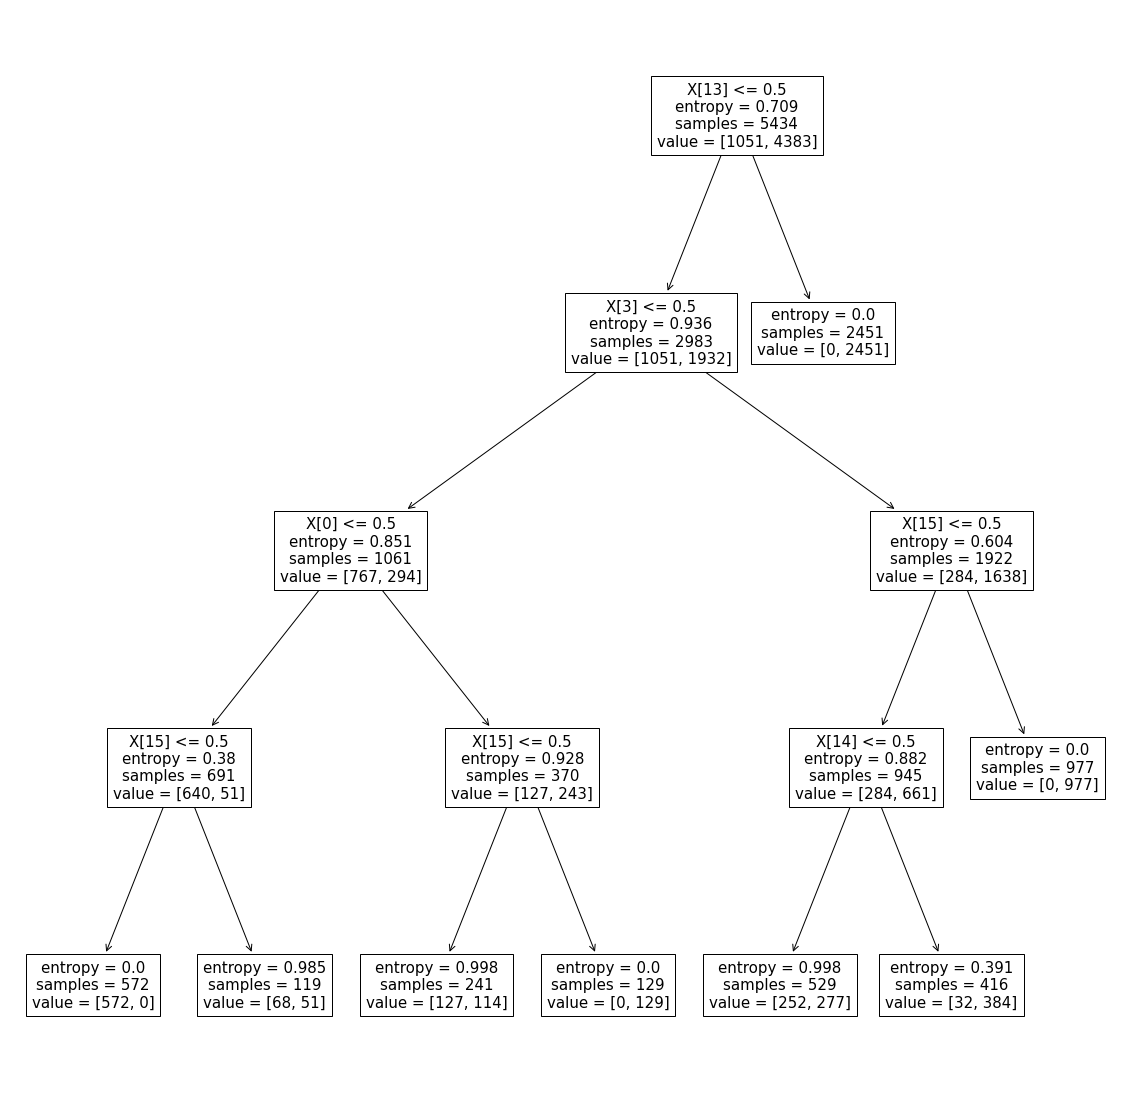

In [ ]:
X=data.drop('COVID-19',axis=1)
y=data['COVID-19']
from sklearn import tree
from matplotlib import pyplot as plt


#build decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to covid dataset
clf.fit(X,y)

#plot decision tree
fig, ax = plt.subplots(figsize=(20, 20)) #figsize value changes the size of plot
tree.plot_tree(clf) 
plt.show()

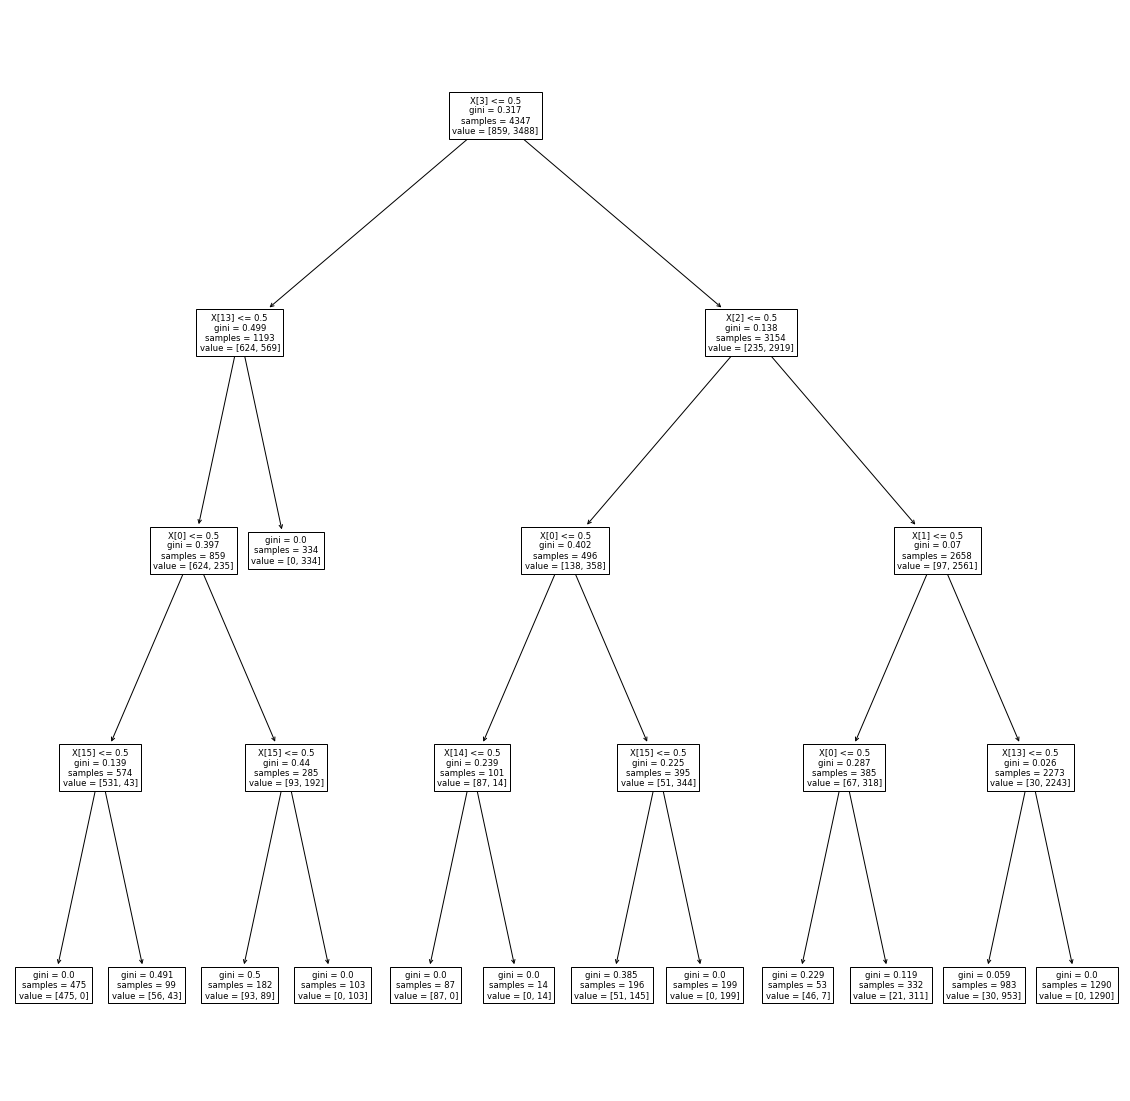

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf_gini) #DT using gini index, max depth=4
plt.show()

**Decision tree Regressor**

In [ ]:
target = data['COVID-19']
df1 = data.copy()
df1 = df1.drop('COVID-19', axis =1)

In [ ]:
# Defining the attributes
X = df1

In [ ]:
target

0       1
1       1
2       1
3       1
4       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5434, dtype: int8

In [ ]:
y = target

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (4347, 20)
Testing split input-  (1087, 20)


In [ ]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


[Text(0.3821428571428571, 0.9583333333333334, 'X[3] <= 0.5\ngini = 0.312\nsamples = 5434\nvalue = [1051, 4383]'),
 Text(0.17142857142857143, 0.875, 'X[13] <= 0.5\ngini = 0.499\nsamples = 1481\nvalue = [767, 714]'),
 Text(0.14285714285714285, 0.7916666666666666, 'X[0] <= 0.5\ngini = 0.401\nsamples = 1061\nvalue = [767, 294]'),
 Text(0.05714285714285714, 0.7083333333333334, 'X[15] <= 0.5\ngini = 0.137\nsamples = 691\nvalue = [640, 51]'),
 Text(0.02857142857142857, 0.625, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.08571428571428572, 0.625, 'X[2] <= 0.5\ngini = 0.49\nsamples = 119\nvalue = [68, 51]'),
 Text(0.05714285714285714, 0.5416666666666666, 'X[9] <= 0.5\ngini = 0.029\nsamples = 69\nvalue = [68, 1]'),
 Text(0.02857142857142857, 0.4583333333333333, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.08571428571428572, 0.4583333333333333, 'X[7] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.05714285714285714, 0.375, 'X[17] <= 0.5\ngini = 0.278\nsamples = 

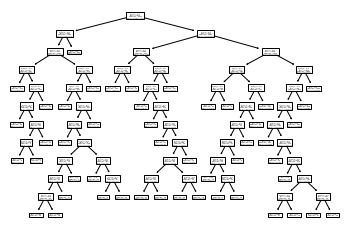

In [ ]:
x=data.drop('COVID-19',axis=1)
#y=data.COVID19
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
tree.plot_tree(clf)

Text(0.5, 1.0, 'Accuracy Score: 0.984360625574977')

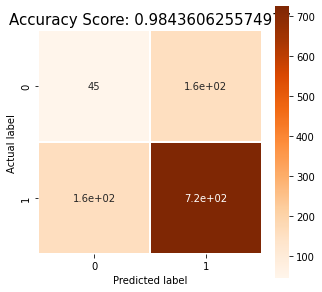

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Oranges')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
3372,1,1.0
4950,0,0.0
2146,1,1.0
501,1,1.0
3418,1,1.0
...,...,...
4998,0,0.0
2458,1,1.0
3733,1,1.0
2406,1,1.0


**Evaluating the Algorithm**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.021689115674814453
Mean Squared Error: 0.011766346058701693
Root Mean Squared Error: 0.10847278948520543
